Find the optimal number of components.

Use the normalized_aggregated.csv inside the same folder (1 line ('VLTO') with string data removed).

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [115]:
# data
data = pd.read_csv('normalized_aggregated.csv', header=0, index_col=0)
print(data)

          Volume  Market Cap  P/E Ratio      vec0      vec1      vec2  \
Symbol                                                                  
MAR     0.015737    0.020658   0.049294  0.316334  1.048552  2.349689   
AXP     0.025195    0.040308   0.069848  0.243799  0.849144  1.890666   
GL      0.004342    0.003998   0.079720  0.313717  1.007221  2.212035   
HUM     0.008489    0.021264   0.050670  0.340956  1.084343  2.426147   
A       0.016850    0.011550   0.035039  0.241640  0.687393  1.575883   
...          ...         ...        ...       ...       ...       ...   
ILMN    0.014255    0.006702   0.000000  0.245696  0.806579  1.851406   
PODD    0.012258    0.004110   0.005536  0.206544  0.161440  0.460833   
GPC     0.008078    0.006803   0.066110  0.245248  0.736660  1.754952   
BWA     0.016988    0.002839   0.121403  0.248243  0.790239  1.822125   
HES     0.021530    0.016267   0.032545  0.182438  0.645374  1.456448   

            vec3      vec4  Volatility  
Symbol   

In [116]:
# Silohuette coefficient
n_clusters = np.arange(2, 20)
sils = []
sils_err = []
iterations = 20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(data) 
        labels = gmm.predict(data)
        sil = metrics.silhouette_score(data, labels, metric='euclidean')
        tmp_sil.append(sil)
    tmp_sil = np.array(tmp_sil)
    dx = np.argsort(tmp_sil)[:int(iterations/5)]
    val = np.mean(tmp_sil[dx])
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

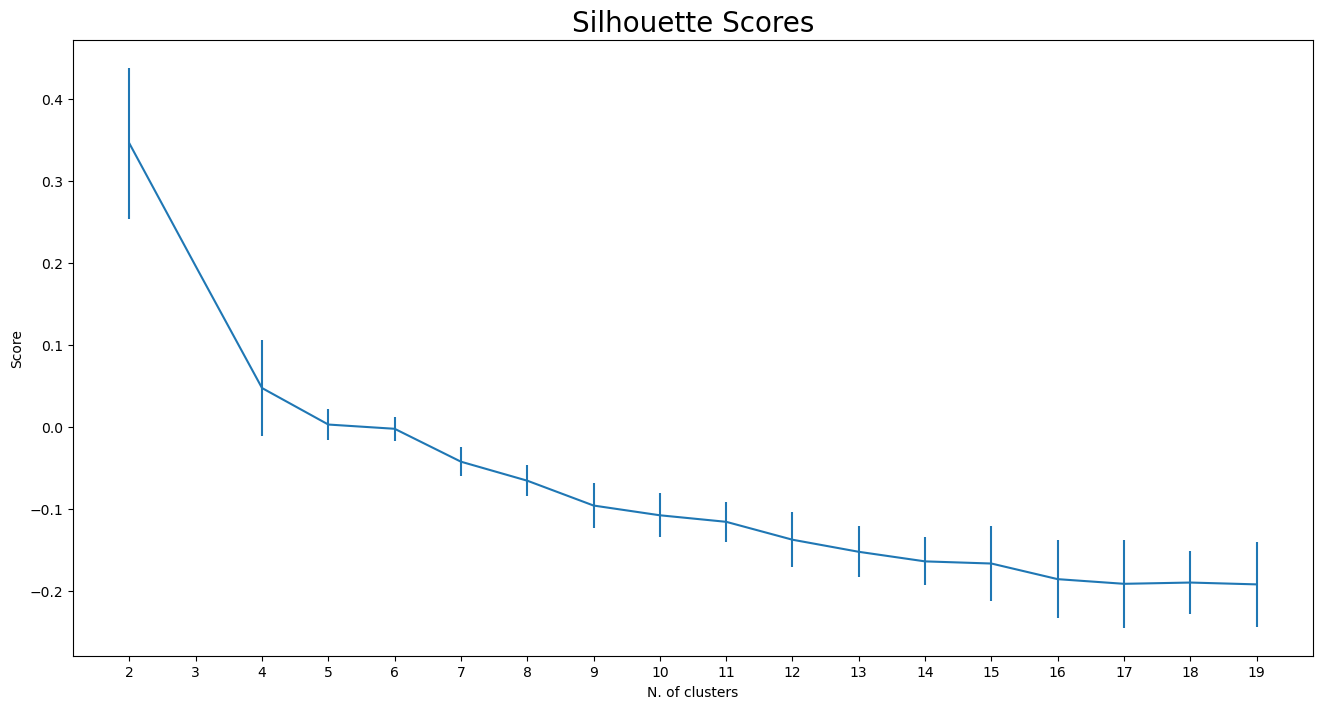

In [117]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

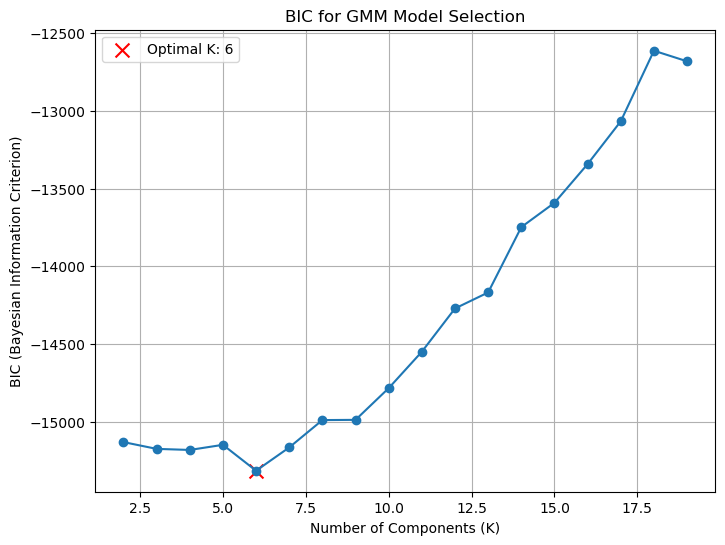

Optimal number of components (K) according to BIC: 6


In [118]:
# Bayesian information criterion (BIC) 1
n_components = np.arange(2, 20)
bic_values = []
# Fit GMM models for different K values and calculate BIC
for n in n_components:
    gmm = GMM(n_components=n, n_init=2, random_state=0)
    gmm.fit(data)
    bic = gmm.bic(data)
    bic_values.append(bic)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Plot the BIC values against the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components, bic_values, marker='o')
plt.xlabel("Number of Components (K)")
plt.ylabel("BIC (Bayesian Information Criterion)")
plt.title("BIC for GMM Model Selection")
plt.grid(True)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Mark the optimal point on the plot
plt.scatter(optimal_n_components, min(bic_values), c='red', marker='x', s=100, label=f'Optimal K: {optimal_n_components}')
plt.legend()

plt.show()

print("Optimal number of components (K) according to BIC:", optimal_n_components)

In [119]:
# Bayesian information criterion (BIC) 2
n_clusters = np.arange(2, 20)
bics = []
bics_err = []
iterations = 20
for n in n_clusters:
    tmp_bic =[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(data)
        tmp_bic.append(gmm.bic(data))
    tmp_bic = np.array(tmp_bic)
    dx = np.argsort(tmp_bic)[:int(iterations/5)]
    val = np.mean(tmp_bic[dx])
    err = np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

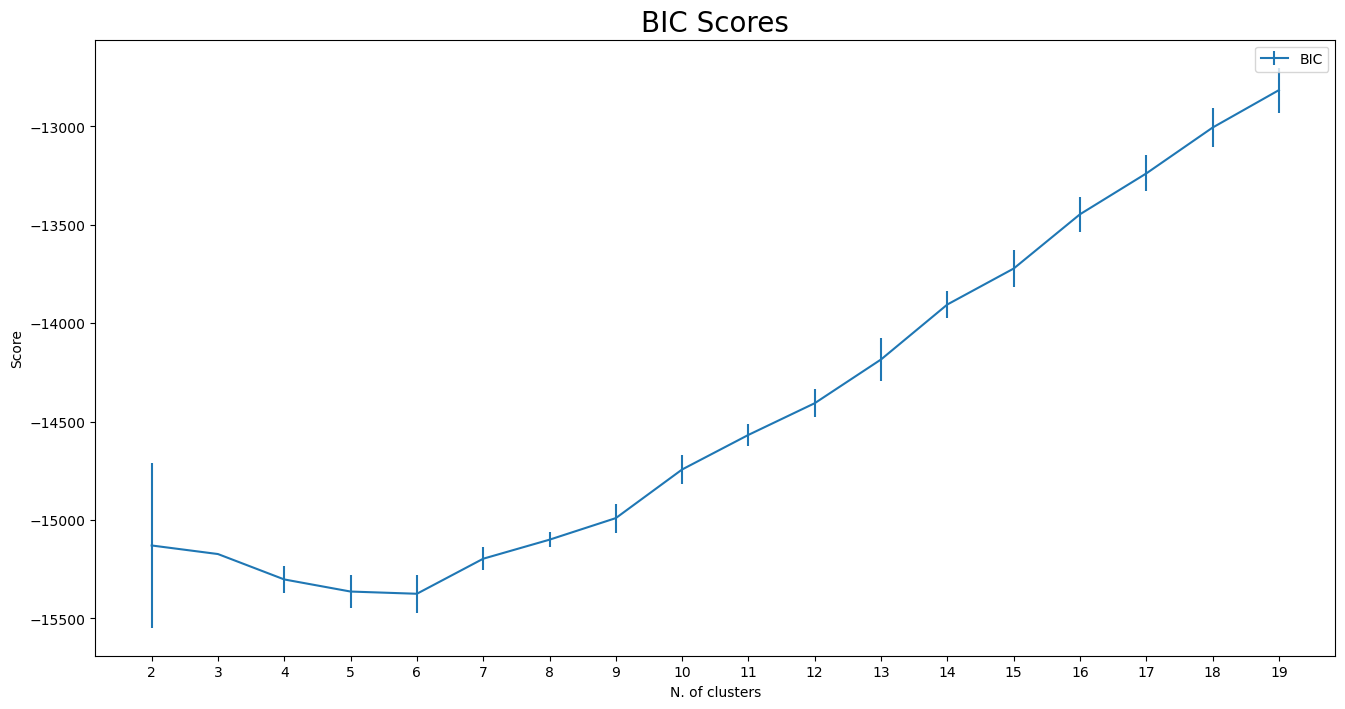

In [120]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

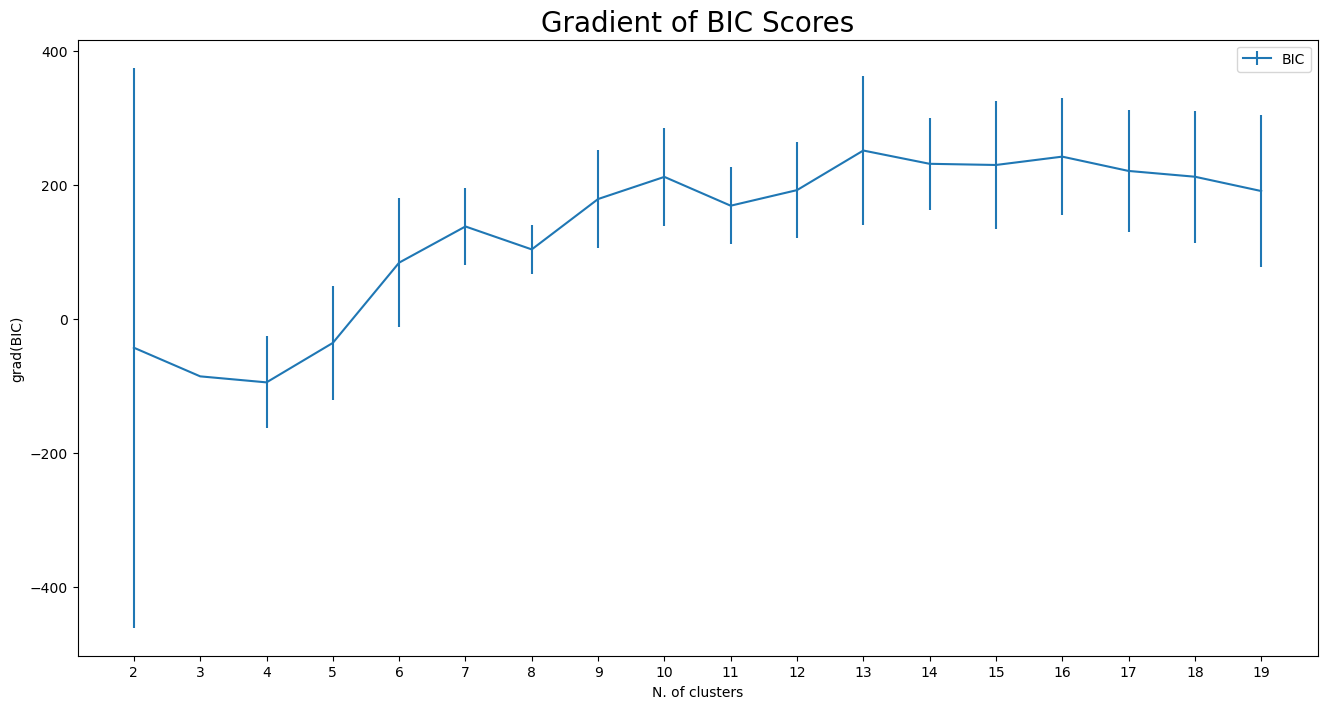

In [121]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [122]:
gmm=GMM(n_components=6, random_state=0).fit(data)
probs = gmm.predict_proba(data)
probs_df = pd.DataFrame(probs)
probs_df.to_csv("probs_6_components.csv", index=0)

In [123]:
gmm=GMM(n_components=5, random_state=0).fit(data)
probs = gmm.predict_proba(data)
probs_df = pd.DataFrame(probs)
probs_df.to_csv("probs_5_components.csv", index=0)

In [124]:
gmm=GMM(n_components=4, random_state=0).fit(data)
probs = gmm.predict_proba(data)
probs_df = pd.DataFrame(probs)
probs_df.to_csv("probs_4_components.csv", index=0)

For probs.csv files, the Symbol (stock ticker) column needs to be added.